In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

# Loading Data

In [3]:
df=pd.read_csv('data/cars.csv')

In [4]:

mappings = {'First Owner':1,
            'Second Owner':2,
            'Third Owner':3,
            'Fourth & Above Owner':4,
            'Test Drive Car':5}
df['owner']=df['owner'].map(mappings)
df['owner'].unique()

array([1, 2, 3, 4, 5])

In [5]:
df=df[(df['fuel']!='LPG') & (df['fuel']!='CNG')]
df['fuel'].unique()

array(['Diesel', 'Petrol'], dtype=object)

In [6]:
df['mileage']=df.mileage.str.split()
df['mileage']=df['mileage'].str[0].astype(float)

df['engine']=df.engine.str.split()
df['engine']=df['engine'].str[0].astype(float)

df['max_power']=df.max_power.str.split()
df['max_power']=df['max_power'].str[0].astype(float)

df['brand']=df.name.str.split()
df['brand']=df['brand'].str[0].astype(str)
                                    

df[['engine','mileage','max_power','brand']].head()

,engine,mileage,max_power,brand
0,1248.0,23.40,74.00,Maruti
1,1498.0,21.14,103.52,Skoda
2,1497.0,17.70,78.00,Honda
3,1396.0,23.00,90.00,Hyundai
4,1298.0,16.10,88.20,Maruti


In [7]:
df=df.drop(labels='torque',axis='columns')
df=df.drop(labels='name',axis='columns')
df=df[df['owner']!=5]

In [8]:

df.head()



,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
0,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0,Maruti
1,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0,Skoda
2,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0,Honda
3,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0,Hyundai
4,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0,Maruti


# Plotting

<Axes: xlabel='owner', ylabel='count'>

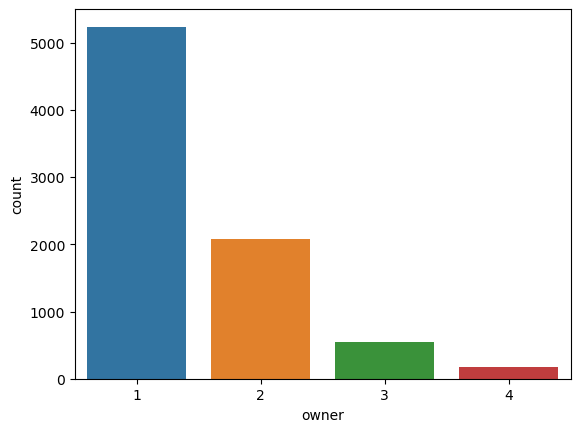

In [9]:
sns.countplot(data=df,x='owner')

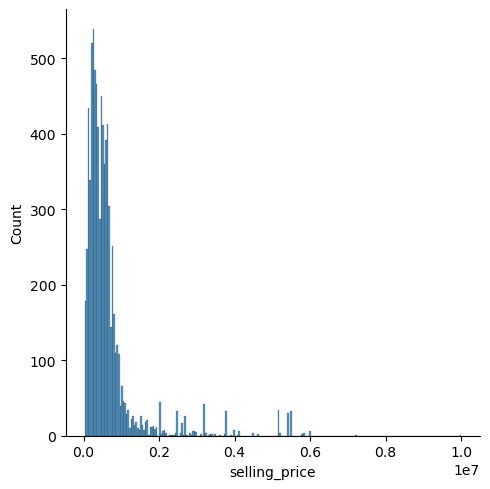

In [10]:
sns.displot(data=df,x='selling_price')

<Axes: xlabel='owner', ylabel='selling_price'>

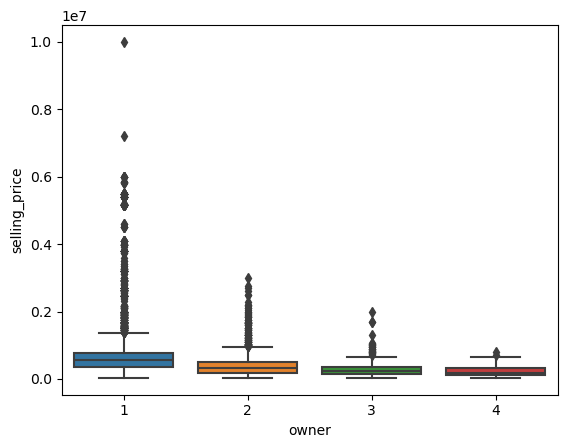

In [11]:
sns.boxplot(data=df,x='owner',y='selling_price')

<Axes: xlabel='year', ylabel='selling_price'>

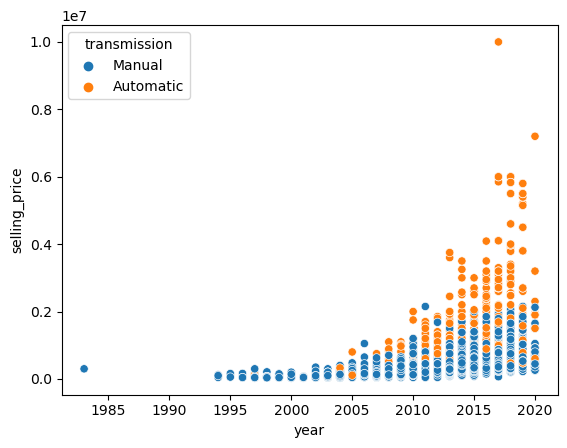

In [12]:
sns.scatterplot(data=df,x='year',y='selling_price',hue='transmission')

<Axes: xlabel='max_power', ylabel='selling_price'>

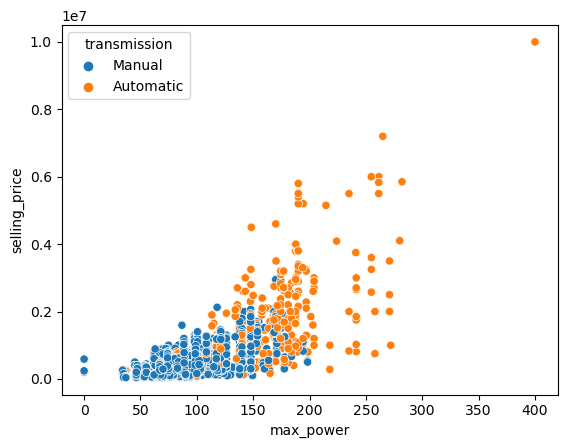

In [13]:
sns.scatterplot(data=df,x='max_power',y='selling_price',hue='transmission')

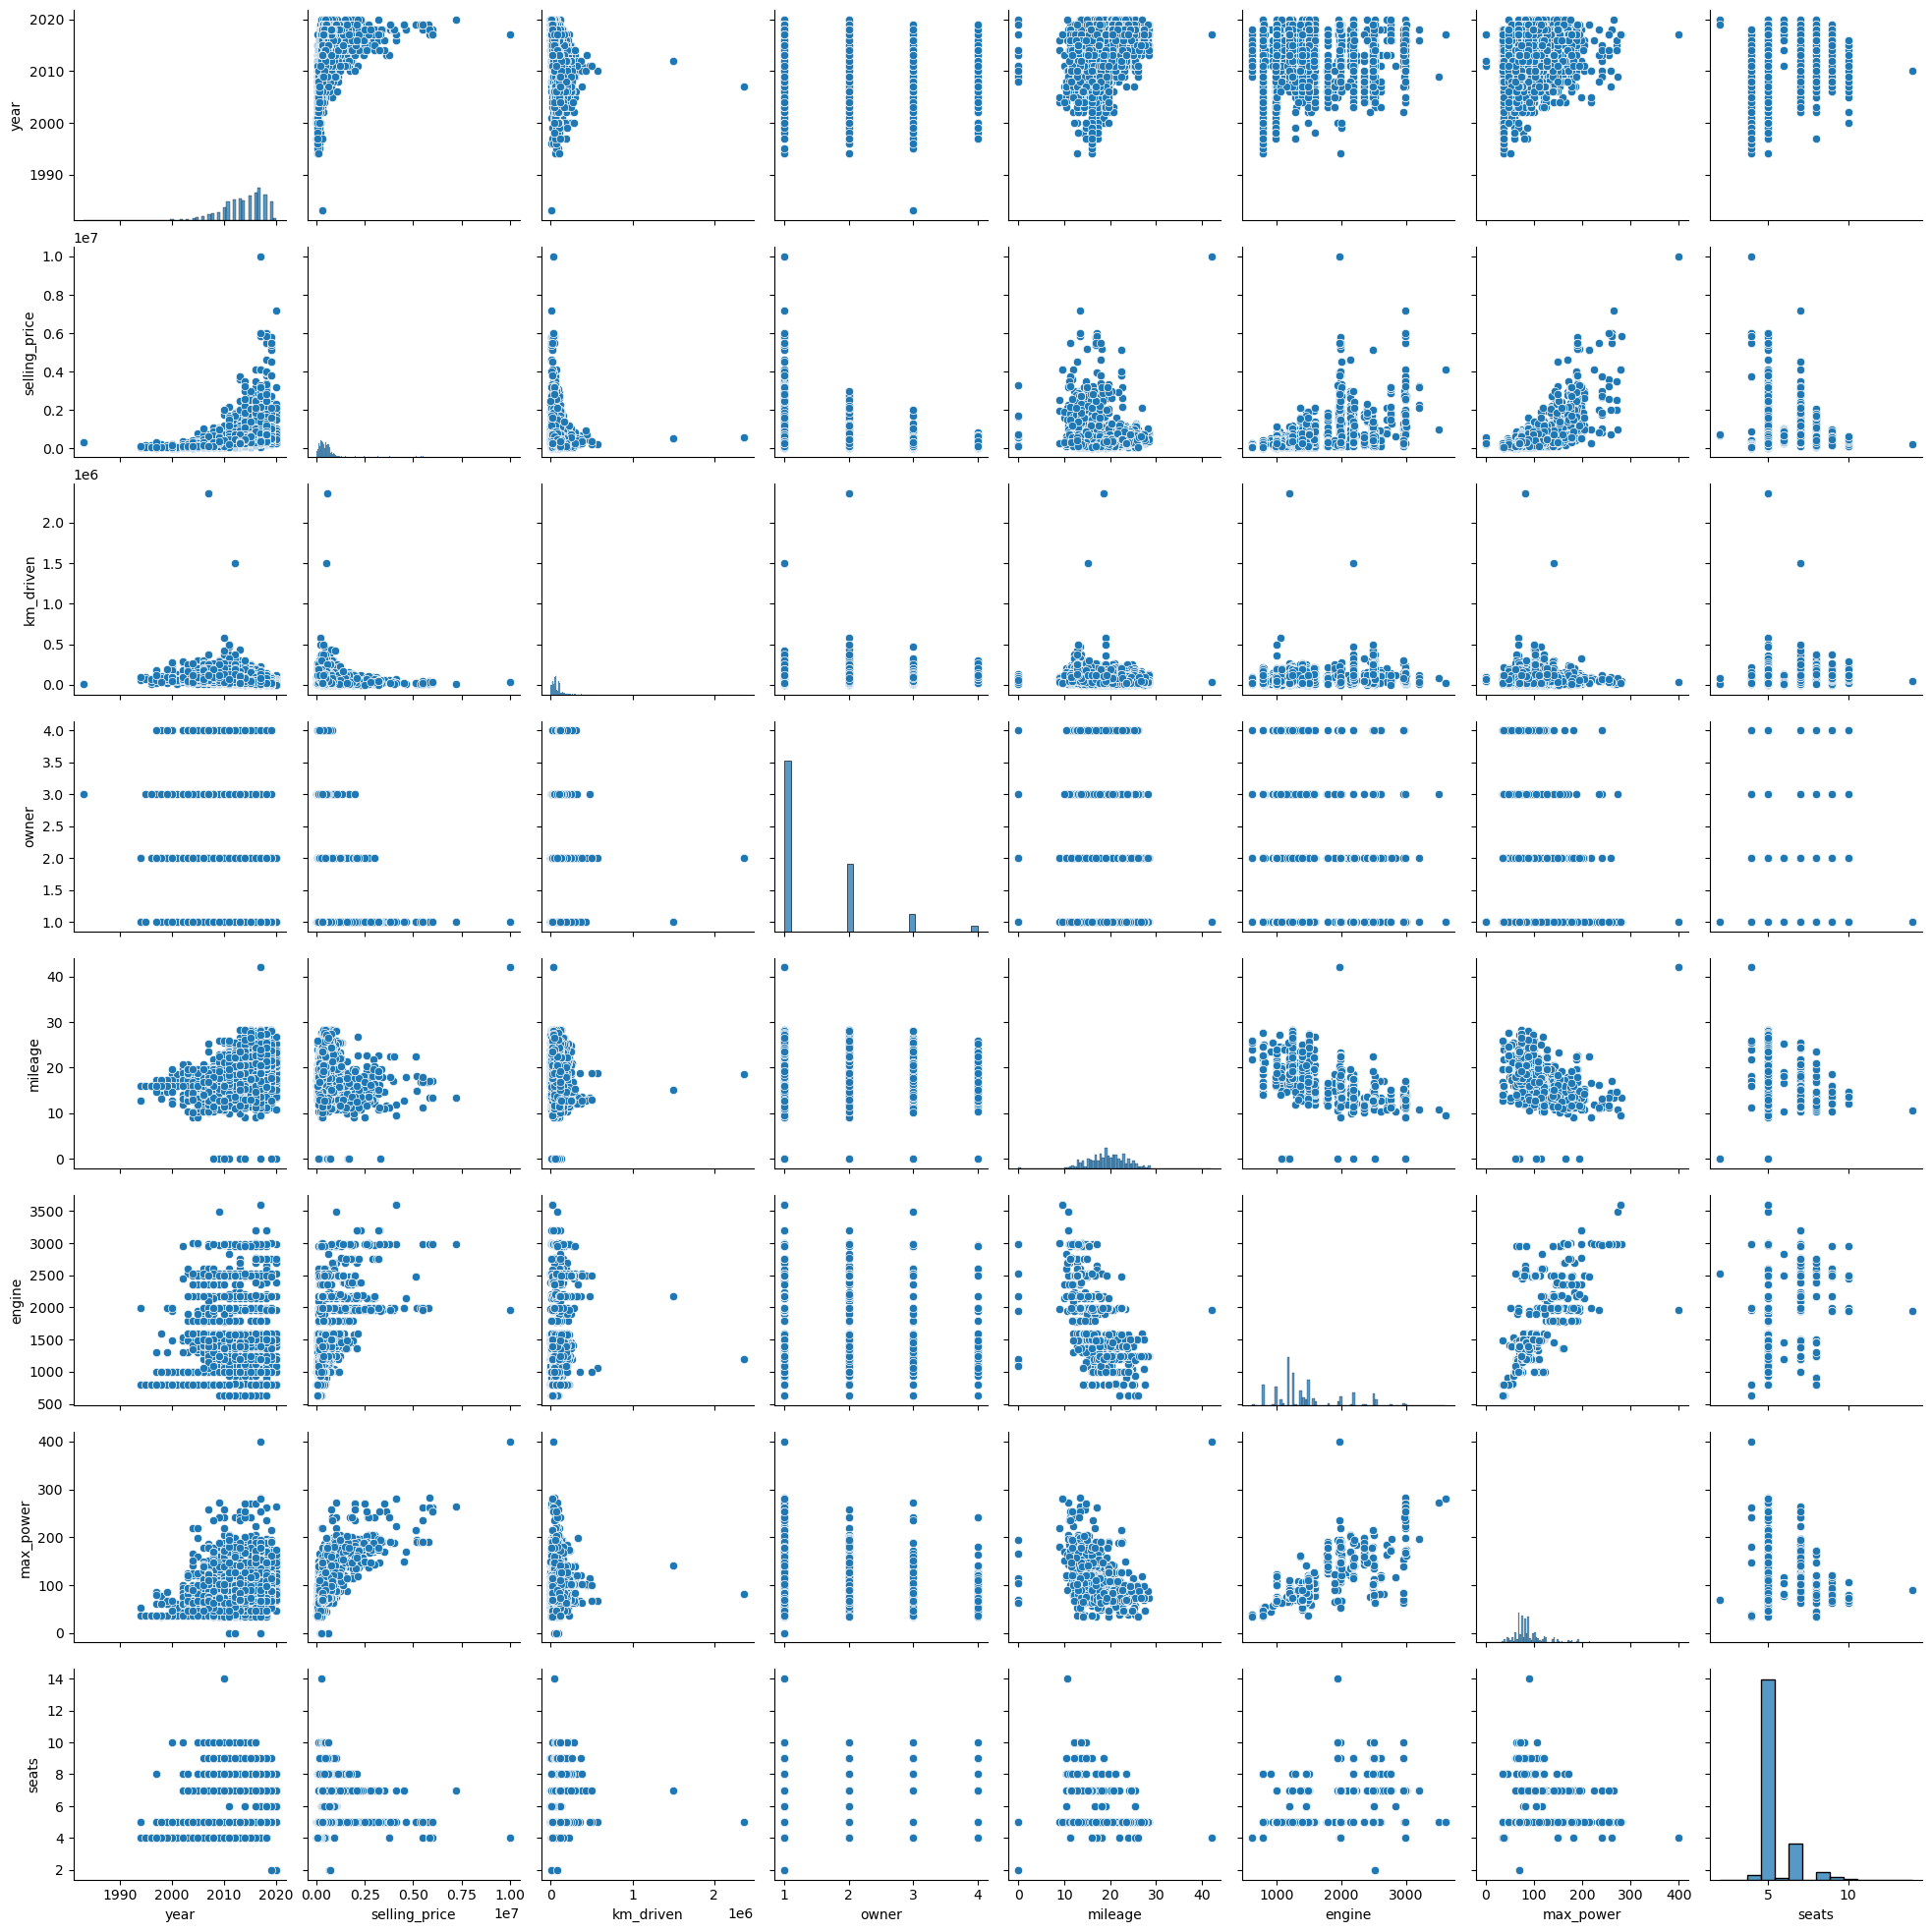

In [14]:
sns.pairplot(df)

# One Hot Encoding

In [15]:
categorical_columns = ['transmission','seller_type']

for col in categorical_columns:
    
    print(f"Category in {col} is : {df[col].unique()}")

Category in transmission is : ['Manual' 'Automatic']
Category in seller_type is : ['Individual' 'Dealer' 'Trustmark Dealer']


In [16]:
#df = pd.get_dummies(df, columns=['transmission'], drop_first=True)
#df['transmission'].unique()

In [17]:
df['fuel'].describe()

count       8028
unique         2
top       Diesel
freq        4401
Name: fuel, dtype: object

<Axes: >

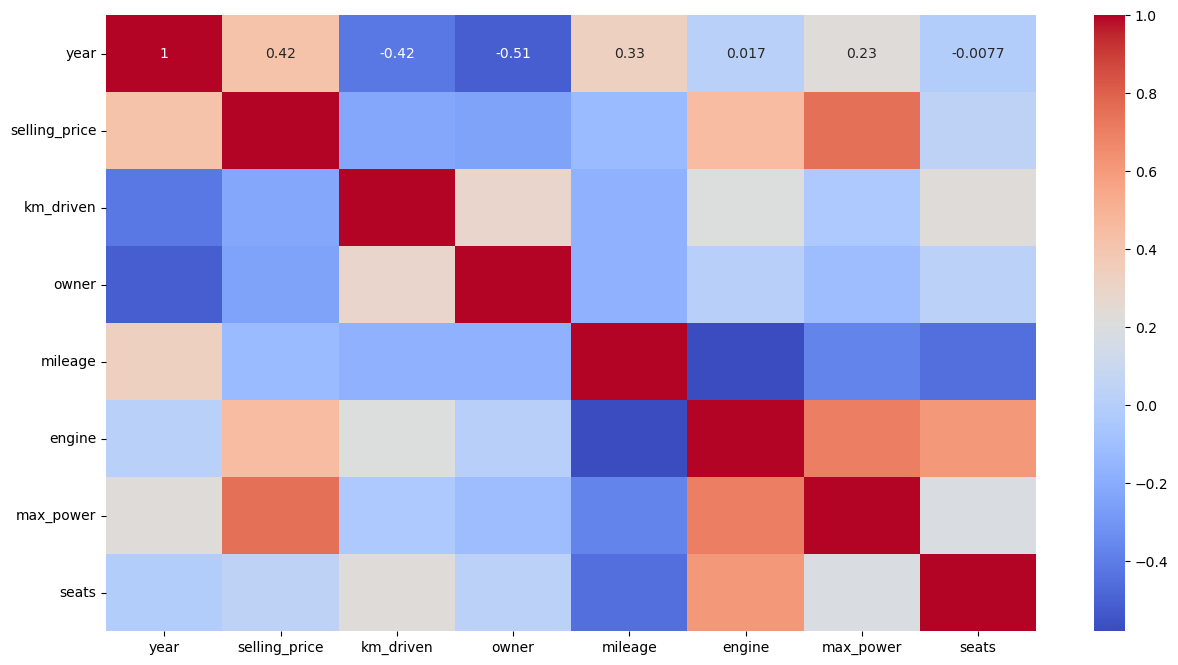

In [18]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")

# Feature Selection Splitting Test and Train set

In [19]:
numeric_features = ['year', 'max_power', 'mileage',]
categorical_features = ['brand', 'fuel',]
X=df[numeric_features + categorical_features]
y=np.log(df['selling_price'].astype(float))
print(X.shape) 
print(y.shape)
print(type(X))
print(type(y))

(8028, 5)
(8028,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
X_train.shape, X_test.shape

((6422, 5), (1606, 5))

In [22]:
y_train.shape, y_test.shape

((6422,), (1606,))

# Preprocessing on X train X test

In [23]:
print('X_train_missing_values:')
print(X_train.isnull().sum())
print('\nX_test_missing_values:')
print(X_test.isnull().sum())
print('\ny_train_missing_values:')
print(y_train.isnull().sum())
print('y_test_missing_values:')
print(y_test.isnull().sum())

X_train_missing_values:
year           0
max_power    165
mileage      171
brand          0
fuel           0
dtype: int64

X_test_missing_values:
year          0
max_power    43
mileage      43
brand         0
fuel          0
dtype: int64

y_train_missing_values:
0
y_test_missing_values:
0


<Axes: xlabel='max_power', ylabel='Count'>

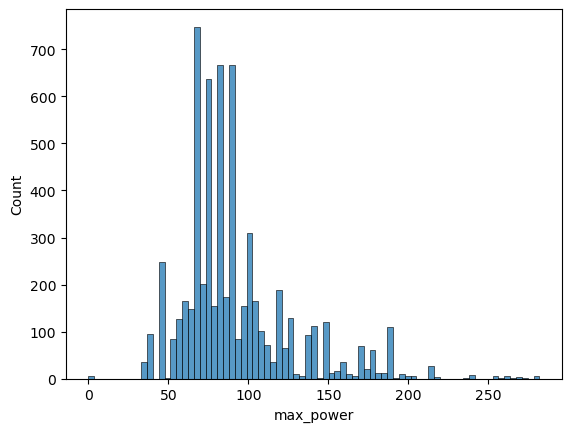

In [24]:
sns.histplot(data=X_train,x=X_train['max_power'])

Filling Missing Values

In [25]:
X_train['max_power']=np.nan_to_num(X_train['max_power'],nan=X_train['max_power'].median())
X_test['max_power']=np.nan_to_num(X_test['max_power'],nan=X_train['max_power'].median())
X_train['mileage']=np.nan_to_num(X_train['mileage'],nan=X_train['mileage'].median())
X_test['mileage']=np.nan_to_num(X_test['mileage'],nan=X_train['mileage'].median())


In [26]:
print("X_train_set missing_values: ")
print(X_train.isnull().sum())
print('\nX_test_set missing_values:')
print(X_test.isnull().sum())

X_train_set missing_values: 
year         0
max_power    0
mileage      0
brand        0
fuel         0
dtype: int64

X_test_set missing_values:
year         0
max_power    0
mileage      0
brand        0
fuel         0
dtype: int64


In [27]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=1))
])


In [28]:
df.head(5)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
0,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0,Maruti
1,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0,Skoda
2,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0,Honda
3,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0,Hyundai
4,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0,Maruti


# Boxplot visualize outliers

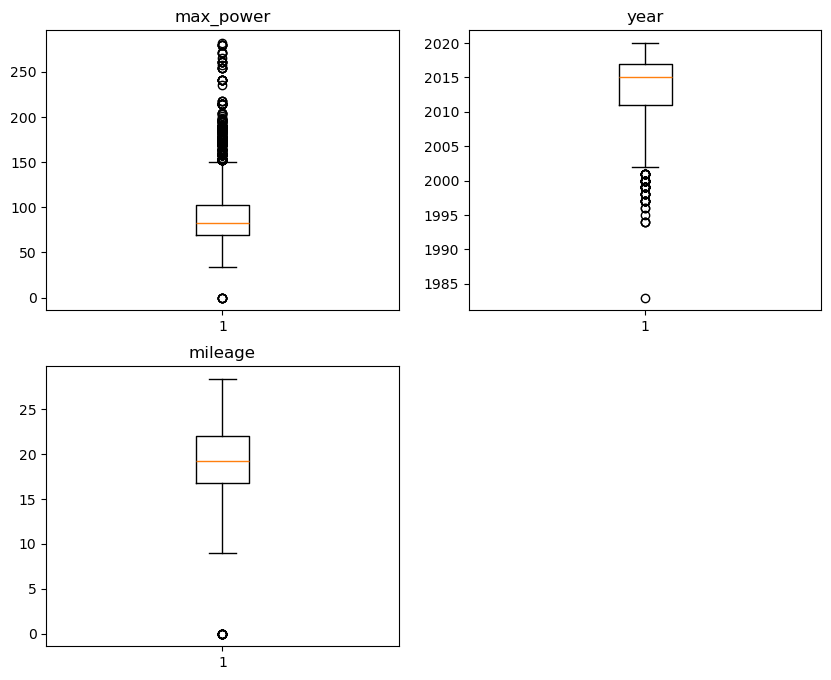

In [29]:
col_dict = {'max_power':1, 'year':2,'mileage':3}
plt.figure(figsize=(10,8))
for var, i in col_dict.items():
    plt.subplot(2,2,i)
    plt.boxplot(X_train[var])
    plt.title(var)
plt.show()

In [30]:
def outlier_count(col, data = X_train):
    if not np.issubdtype(data[col].dtype, np.number):
        return
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [31]:
for col in X_train.columns:
    outlier_count(col)


---------------year---------------

Number of outliers: 63
Percent of data that is outlier: 0.98%

---------------max_power---------------

Number of outliers: 459
Percent of data that is outlier: 7.15%

---------------mileage---------------

Number of outliers: 16
Percent of data that is outlier: 0.25%


In [32]:
df1=df[df['year']<1993]
df1

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
316,1983,300000,10000,Diesel,Individual,Manual,3,NaN,NaN,NaN,NaN,Mahindra


In [33]:
X_train.head(5)

,year,max_power,mileage,brand,fuel
2982,2016,53.30,25.17,Renault,Petrol
2430,2013,47.30,22.74,Maruti,Petrol
6294,2009,82.85,19.30,Hyundai,Petrol
6255,2018,153.86,17.60,Tata,Diesel
4253,1999,68.00,14.80,Mitsubishi,Diesel


# Model

In [34]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Libraries for model evaluation

from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score

# Models
algorithms = [
    LinearRegression(),
    SVR(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(random_state=0),
    RandomForestRegressor(n_estimators=100, random_state=0)
]

algorithm_names = [
    "Linear Regression",
    "SVR",
    "KNeighbors Regressor",
    "Decision-Tree Regressor",
    "Random-Forest Regressor"
]

# Cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

for i, model in enumerate(algorithms):
    pipe = Pipeline(steps=[("preprocessor", preprocessor),
                           ("model", model)])
    
    scores = cross_val_score(pipe, X_train, y_train,
                             cv=kfold,
                             scoring="neg_mean_squared_error")
    
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")


Linear Regression - Score: [-0.07304244 -0.06513193 -0.08456708 -0.06615042 -0.06768525]; Mean: -0.07131542467648497
SVR - Score: [-0.04897694 -0.04606922 -0.05040257 -0.04832398 -0.0497421 ]; Mean: -0.0487029604605292
KNeighbors Regressor - Score: [-0.05676617 -0.04986676 -0.05381825 -0.05391123 -0.05435578]; Mean: -0.05374363783978427
Decision-Tree Regressor - Score: [-0.06020432 -0.05769322 -0.06674765 -0.0607333  -0.06285017]; Mean: -0.061645732756916496
Random-Forest Regressor - Score: [-0.04932215 -0.04564113 -0.0521478  -0.05260097 -0.0499    ]; Mean: -0.049922409777474204


In [35]:
from sklearn.model_selection import GridSearchCV, KFold

param_grid = {
    'regressor__n_estimators': [50, 200],
    'regressor__max_depth': [None, 10, 20],
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring="neg_mean_squared_error",
    n_jobs=1,  
    return_train_score=True
)


grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
best_pipeline = grid.best_estimator_


Best params: {'regressor__max_depth': None, 'regressor__n_estimators': 200}


# Testing

In [36]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred_log = best_pipeline.predict(X_test)

r2_log = r2_score(y_test, y_pred_log)
print("R2 (log space):", r2_log)

y_test_price = np.exp(y_test)
y_pred_price = np.exp(y_pred_log)

mse_price = mean_squared_error(y_test_price, y_pred_price)

rmse_price = np.sqrt(mse_price)
print("RMSE (price):", rmse_price)

R2 (log space): 0.9397209593504786
RMSE (price): 212675.48519713915


# Feature Importance

In [37]:
rf = rf = best_pipeline.named_steps["regressor"]

rf.feature_importances_

array([4.67764245e-01, 4.46964045e-01, 2.83249481e-02, 5.88589693e-06,
       2.61941108e-06, 2.05769288e-04, 1.08921460e-03, 3.92077869e-03,
       3.17372035e-05, 3.51903411e-04, 4.30657057e-04, 3.24956825e-05,
       1.88115848e-03, 1.07229289e-03, 1.51058554e-03, 7.24896105e-06,
       1.41198181e-03, 5.23040799e-05, 1.35003198e-04, 1.47963725e-04,
       2.51939961e-06, 2.16922177e-06, 9.30252550e-03, 2.02550054e-03,
       9.88824095e-04, 8.08152014e-05, 3.50668647e-04, 5.65007853e-04,
       6.33715785e-04, 1.30781784e-02, 6.41495607e-03, 1.11496586e-03,
       4.50035160e-04, 4.24685793e-03, 5.40042227e-03])

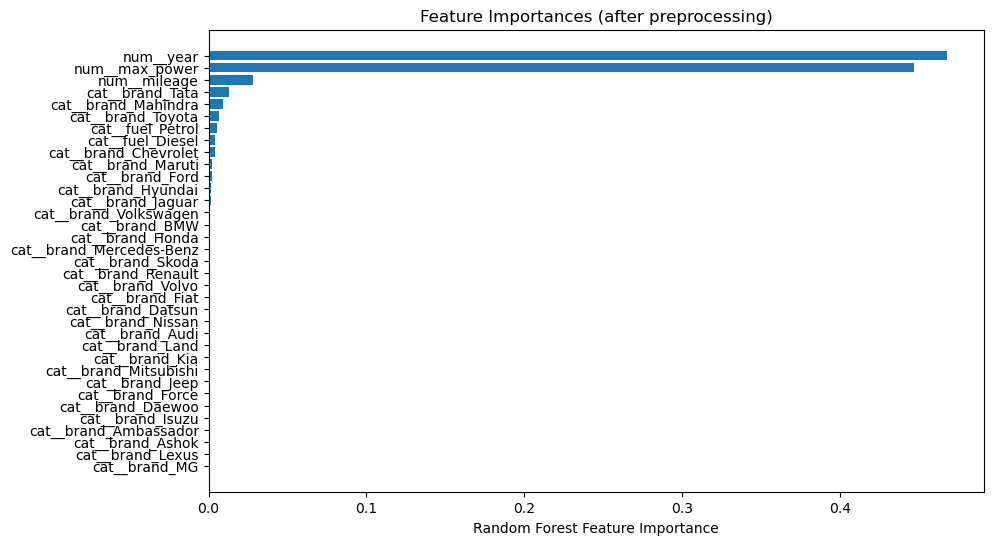

In [38]:
import matplotlib.pyplot as plt

# Get feature names after preprocessing
feature_names = best_pipeline.named_steps["preprocessor"].get_feature_names_out()

# Get feature importances
importances = rf.feature_importances_
sorted_idx = importances.argsort()

# Plot
plt.figure(figsize=(10, 6))
plt.barh([feature_names[i] for i in sorted_idx], importances[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importances (after preprocessing)")
plt.show()


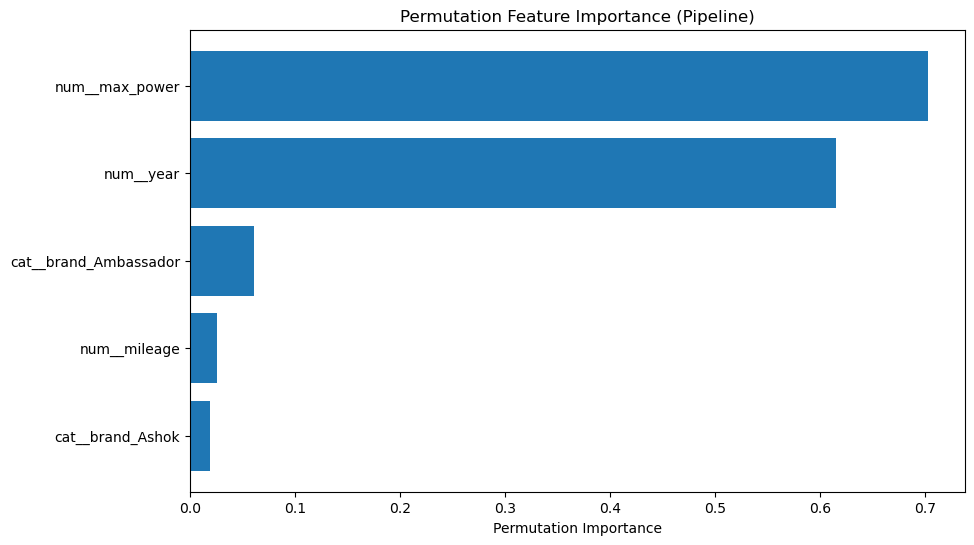

In [39]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

perm_importance = permutation_importance(best_pipeline, X_test, y_test, n_repeats=10, random_state=42)

feature_names = best_pipeline.named_steps["preprocessor"].get_feature_names_out()


sorted_idx = perm_importance.importances_mean.argsort()

# Plot
plt.figure(figsize=(10, 6))
plt.barh([feature_names[i] for i in sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Permutation Feature Importance (Pipeline)")
plt.show()


# Inference

In [40]:
import joblib

joblib.dump(grid, "models/car_price_pipeline.joblib")
pipeline = joblib.load("models/car_price_pipeline.joblib")



In [41]:
df[['year','max_power','selling_price','fuel','brand','mileage']].loc[1]



year               2014
max_power        103.52
selling_price    370000
fuel             Diesel
brand             Skoda
mileage           21.14
Name: 1, dtype: object

In [42]:
sample_data = [[2014, 103.52, 'Diesel', 'Skoda', 21.14]]

column_names = ['year', 'max_power', 'fuel', 'brand', 'mileage']

sample_df = pd.DataFrame(sample_data, columns=column_names)

pred_log = pipeline.predict(sample_df)
print(np.exp(pred_log))

[406080.43586241]


In [43]:

import sklearn, numpy, pandas, joblib
print("scikit-learn:", sklearn.__version__)
print("numpy:", numpy.__version__)
print("pandas:", pandas.__version__)
print("joblib:", joblib.__version__)


scikit-learn: 1.7.1
numpy: 1.24.4
pandas: 1.5.3
joblib: 1.2.0


In this project, we trained several regression models to predict used car prices. To ensure that categorical features (such as brand, fuel type, and owner type) were properly handled, we used a preprocessing pipeline combining OneHotEncoder for categorical features and StandardScaler for numerical features like registration year and mileage. This design ensured that all models could process the data consistently during training and evaluation. Cross-validation was applied to compare model performance across multiple folds, providing a more robust estimate of generalization.

The results show that tree-based models, particularly the Random Forest Regressor, performed better compared to linear models and SVR. This makes sense because Random Forests can capture complex, nonlinear interactions between variables, while simpler models like Linear Regression assume a linear relationship. KNN performed moderately, but its performance was sensitive to scaling and the choice of neighbors. SVR underperformed, likely due to the high dimensionality created by one-hot encoding.

Regarding feature importance, Random Forests indicated that numerical features such as year, max_power and engine(don't choose as correlated with max_power) are among the most predictive, as they directly reflect depreciation and usage. Among categorical variables, brand and fuel type contributed strongly, while features like color had minimal effect. This aligns with domain intuition: the max_power, year, and mileage of a car are primary determinants of price, while cosmetic details have less impact. Overall, tree-based ensemble methods appear to be the most effective for this dataset, both in predictive performance and interpretability.

In [44]:
import sys
print(sys.executable)


/opt/anaconda3/bin/python
